<a href="https://colab.research.google.com/github/Gyanprakash-20/Disease_Prediction-/blob/main/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
#importing modules
import numpy as np
import pandas as pd
from scipy.stats import mode
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

In [41]:
#encordin the data input in numerical form
encoding = LabelEncoder()
data["prognosis"] = encoding.fit_transform(data["prognosis"])


In [42]:

X=data.iloc[:,:-1]
Y=data.iloc[:, -1]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=24)
print(f"Trian: {X_train.shape }, {Y_train.shape}")
print(f"Test :{X_test.shape} , {Y_test.shape}")

Trian: (3936, 132), (3936,)
Test :(984, 132) , (984,)


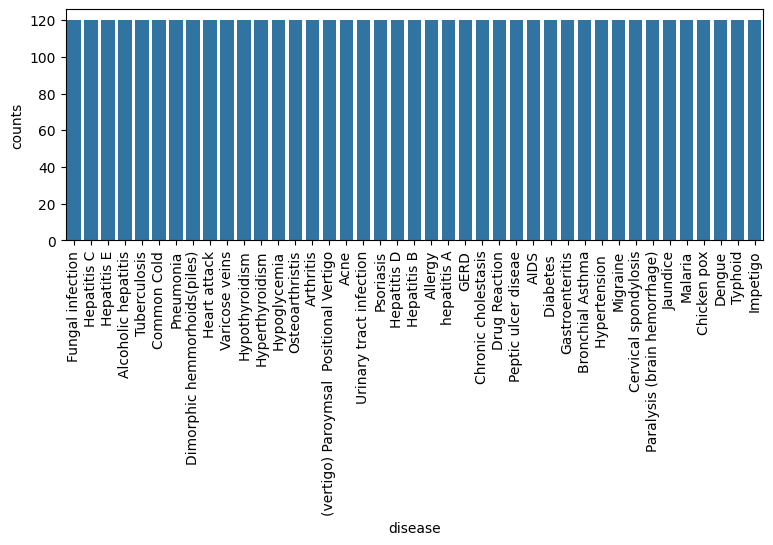

In [43]:
#Read the data from the csv file and
#exculde the last column as it is empty

Data_Path="/content/Training.csv"
data=pd.read_csv(Data_Path).dropna(axis=1)
data.head()

#to check the data set is balanced or not
#by using the matplot library
diseasec=data['prognosis'].value_counts()
temp_def=({
    'disease':diseasec.index,
    'counts':diseasec.values
})
plt.figure(figsize=(9,3))
sns.barplot(x='disease',y='counts',data=temp_def)
plt.xticks(rotation=90)
plt.show()


In [29]:

cv_scoring = make_scorer(accuracy_score)

# Initializing Models
models = {
    "SVC": SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18)
}

# Producing cross-validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, Y, cv=10,
                              n_jobs=-1,
                              scoring=cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data(SV):100.0
Accuracy on test data:100.0


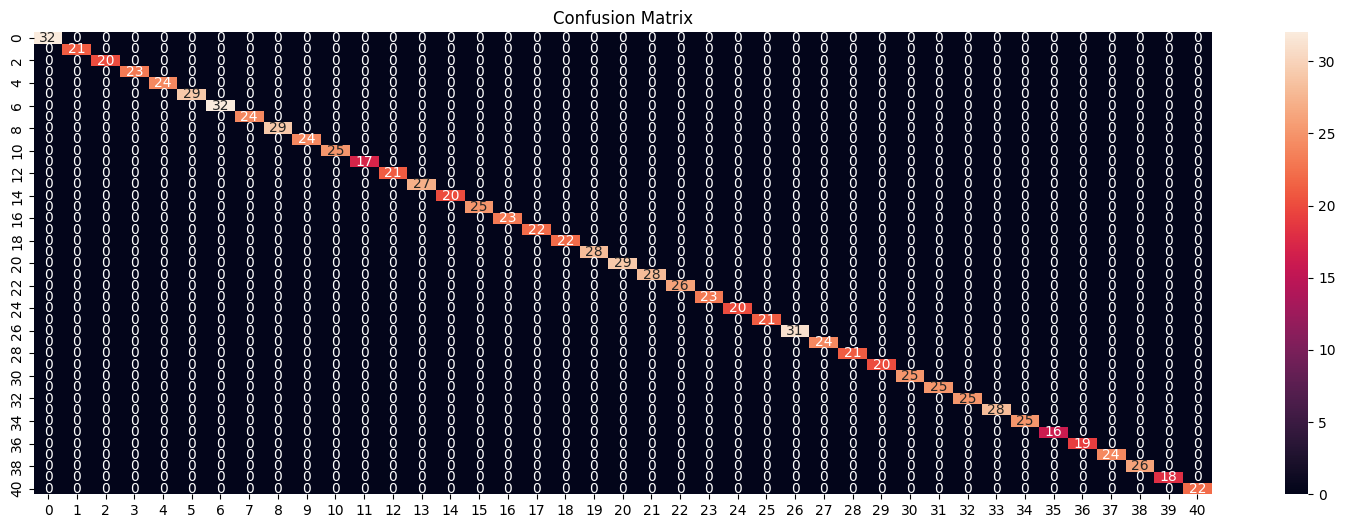

Accuracy on train data(GNB)=>100.0 
Accuracy on test data:100.0


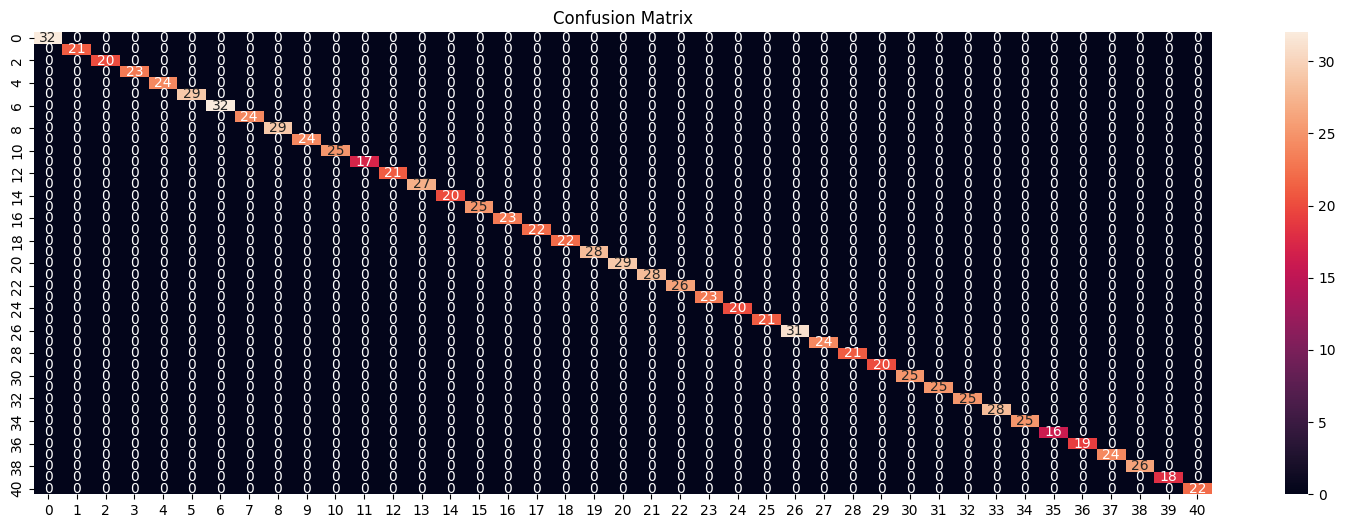

Accuracy on train data(RF):100.0
Accuracy on test data:100.0


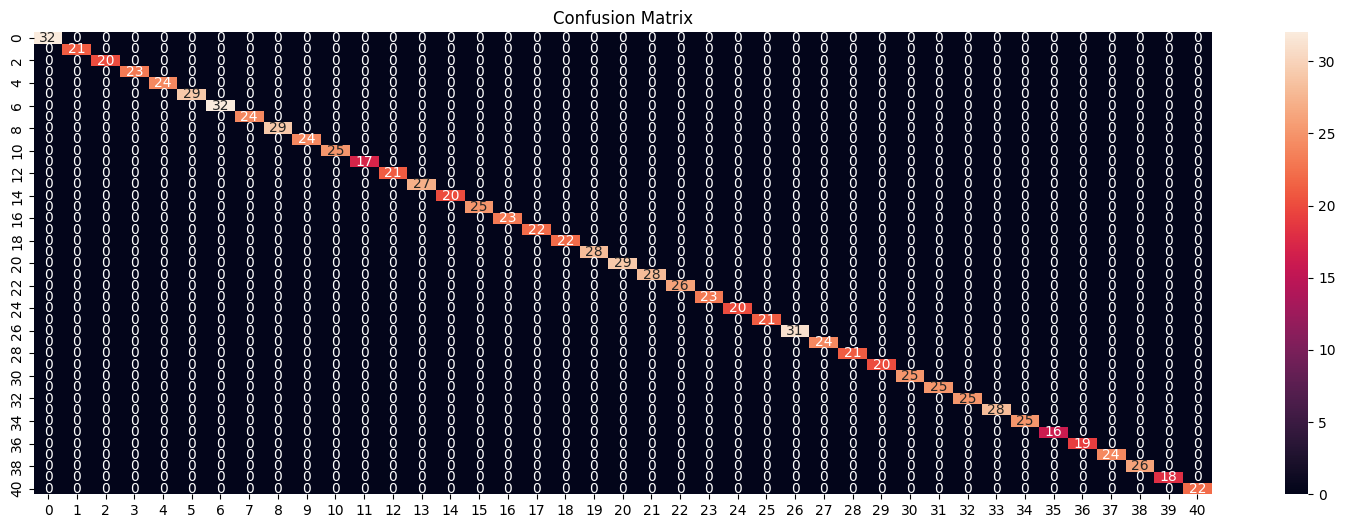

In [57]:
#Training and Testing of Svc classifier Model
SvmModel=SVC()
SvmModel.fit(X_train,Y_train)
predi=SvmModel.predict(X_test)
#for Training fuction
print(f"Accuracy on train data(SV):{accuracy_score(Y_train,SvmModel.predict(X_train))*100}")

#for Testing Function
print(f"Accuracy on test data:{accuracy_score(Y_test,predi)*100}")
cf_matrix=confusion_matrix(Y_test,predi)
plt.figure(figsize=(19,6))
plt.title("Confusion Matrix")
sns.heatmap(cf_matrix,annot=True)
plt.show()

#Training and Testing of GaussianNB model
GNBModel=GaussianNB()
GNBModel.fit(X_train,Y_train)
predi=(GNBModel.predict(X_test))
print(f"Accuracy on train data(GNB)=>{accuracy_score(Y_train,GNBModel.predict(X_train))*100} ")

#for Testing function
print(f"Accuracy on test data:{accuracy_score(Y_test,predi)*100}")
cf_matrix=confusion_matrix(Y_test,predi)
plt.figure(figsize=(19,6))
plt.title("Confusion Matrix")
sns.heatmap(cf_matrix,annot=True)
plt.show()

#Training and Testing for Random Forest Model
RFModel=RandomForestClassifier(random_state=18)
RFModel.fit(X_train,Y_train)
predi=(RFModel.predict(X_test))
print(f"Accuracy on train data(RF):{accuracy_score(Y_train,RFModel.predict(X_train))*100}")

#For Testing function
print(f"Accuracy on test data:{accuracy_score(Y_test,predi)*100}")
cf_matrix=confusion_matrix(Y_test,predi)
plt.figure(figsize=(19,6))
plt.title("Confusion Matrix")
sns.heatmap(cf_matrix,annot=True)
plt.show()

Accuracy on Test dataset by the combined model: 100.0


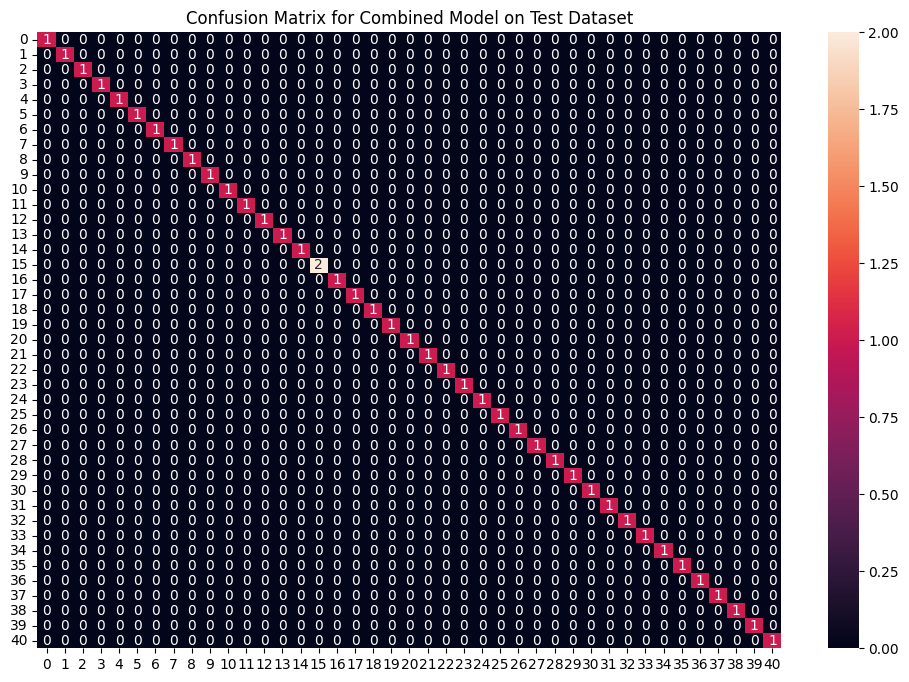

In [55]:
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, Y)
final_nb_model.fit(X, Y)
final_rf_model.fit(X, Y)

# Reading the test data
test_data = pd.read_csv("/content/Testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making prediction by take mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)



final_preds = [stats.mode([i,j,k])[0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


In [56]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)

    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    # making final prediction by taking mode of all predictions
    # Use statistics.mode instead of scipy.stats.mode
    import statistics
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))


{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
